In [1]:
import numpy as np
import pycbc.waveform as pycbc_wf
import bilby
import pycbc
import matplotlib.pyplot as plt
import logging

In [54]:
def trial_model_time(time_array, mass_1, mass_2, luminosity_distance, theta_jn, phase,
         a_1, a_2, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0, 
         **waveform_kwargs):
    """ Modelling the inspital part of the waveform in time domain """
    
    start_frequency = minimum_frequency = waveform_kwargs.get('minimum_frequency', 20.0)
    #maximum_frequency = waveform_kwargs.get('maximum_frequency', frequency_array[-1])
    reference_frequency = waveform_kwargs.get('reference_frequency', 50.0)
    
    start_time = minimum_time = waveform_kwargs.get('minimum_time', time_array[0])
    end_time = maximum_time = waveform_kwargs.get('maximum_time', time_array[-1])
    
    waveform_dictionary = dict(spin_order=-1, tidal_order=-1,
        phase_order=-1, amplitude_order=0)
    
    m1 = mass_1 * bilby.core.utils.solar_mass
    m2 = mass_2 * bilby.core.utils.solar_mass
    
    iota, spin_1x, spin_1y, spin_1z, spin_2x, spin_2y, spin_2z = bilby.gw.conversion.bilby_to_lalsimulation_spins(
        theta_jn=theta_jn, phi_jl=phi_jl, tilt_1=tilt_1, tilt_2=tilt_2,
        phi_12=phi_12, a_1=a_1, a_2=a_2, mass_1=m1, mass_2=m2,
        reference_frequency=reference_frequency, phase=phase)
    
    longitude_ascending_nodes = 0.0
    mean_per_ano = 0.0
    
    #delta_time = time_array[1] - time_array[0]
#     time_bounds = ((time_array >= minimum_time) *
#                         (time_array <= maximum_time))
    
    hpt, hct = pycbc.waveform.get_td_waveform(approximant="TaylorT2",
                                        mass1=mass_1,
                                 mass2=mass_2,
                                 a1= a_1, a2= a_2,
                                 delta_t=1.0/2048,
                                 f_lower=20)
    
    h_plus = np.zeros_like(time_array, dtype=complex)
    h_cross = np.zeros_like(time_array, dtype=complex)
    
    if len(hpt.data.data) > len(time_array):

        h_plus = hpt.data.data[:len(h_plus)]
        h_cross = hct.data.data[:len(h_cross)]
    else:

        
        h_plus[-len(hpt.data.data):] = hpt.data.data
        h_cross[-len(hct.data.data):] = hct.data.data
   

    return h_plus

In [55]:
np.array(trial_model_time(np.arange(1,100,1),30, 30, 400, 0, 1.3,
        0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))

array([ 1.89959619e-19,  1.91006759e-19,  1.91333987e-19,  1.90939441e-19,
        1.89823982e-19,  1.87991199e-19,  1.85447384e-19,  1.82201539e-19,
        1.78265317e-19,  1.73653006e-19,  1.68381475e-19,  1.62470085e-19,
        1.55940683e-19,  1.48817449e-19,  1.41126866e-19,  1.32897594e-19,
        1.24160375e-19,  1.14947908e-19,  1.05294766e-19,  9.52372027e-20,
        8.48130710e-20,  7.40616849e-20,  6.30236233e-20,  5.17406283e-20,
        4.02553983e-20,  2.86114949e-20,  1.68531243e-20,  5.02497282e-21,
       -6.82792821e-21, -1.86604255e-20, -3.04273458e-20, -4.20837248e-20,
       -5.35849902e-20, -6.48870490e-20, -7.59465618e-20, -8.67210227e-20,
       -9.71690047e-20, -1.07250225e-19, -1.16925795e-19, -1.26158297e-19,
       -1.34911986e-19, -1.43152888e-19, -1.50848952e-19, -1.57970201e-19,
       -1.64488781e-19, -1.70379145e-19, -1.75618119e-19, -1.80184992e-19,
       -1.84061623e-19, -1.87232486e-19, -1.89684761e-19, -1.91408365e-19,
       -1.92396017e-19, -

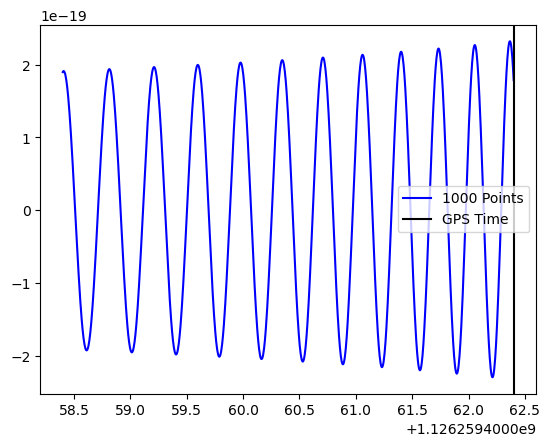

In [57]:
tg = 1126259462.4
t = np.linspace(tg-4,tg,1000)
model = np.array(trial_model_time(t,30, 30, 400, 0, 1.3,
         0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))
t1 = np.linspace(tg-4,tg+4,100)
model1 = np.array(trial_model_time(t1,30, 30, 400, 0, 1.3,
          0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))
# t2 = np.linspace(tg-4,tg+4,10000)
# model2 = np.array(trial_model_time(t2,30, 30, 400, 0, 1.3,
#          0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))
plt.plot(t,model,color='b',label='1000 Points')
#plt.plot(t1,model1,color='r',label='100 Points',alpha='0.5')
#plt.plot(t2,model2,color='g',label='10000 Points',alpha='0.5')
plt.axvline(tg,color='k',label='GPS Time')
plt.legend()
plt.show()

In [19]:
np.array(trial_model_time(t,30, 30, 400, 0, 1.3,
        0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))[:200]

array([ 1.86996153e-19+0.j,  1.88157105e-19+0.j,  1.89140931e-19+0.j,
        1.89946622e-19+0.j,  1.90573343e-19+0.j,  1.91020426e-19+0.j,
        1.91287370e-19+0.j,  1.91373844e-19+0.j,  1.91279688e-19+0.j,
        1.91004914e-19+0.j,  1.90549701e-19+0.j,  1.89914401e-19+0.j,
        1.89099538e-19+0.j,  1.88105798e-19+0.j,  1.86934049e-19+0.j,
        1.85585314e-19+0.j,  1.84060800e-19+0.j,  1.82361862e-19+0.j,
        1.80490042e-19+0.j,  1.78447024e-19+0.j,  1.76234669e-19+0.j,
        1.73855004e-19+0.j,  1.71310203e-19+0.j,  1.68602605e-19+0.j,
        1.65734705e-19+0.j,  1.62709143e-19+0.j,  1.59528719e-19+0.j,
        1.56196383e-19+0.j,  1.52715220e-19+0.j,  1.49088479e-19+0.j,
        1.45319507e-19+0.j,  1.41411844e-19+0.j,  1.37369130e-19+0.j,
        1.33195133e-19+0.j,  1.28893752e-19+0.j,  1.24469033e-19+0.j,
        1.19925103e-19+0.j,  1.15266234e-19+0.j,  1.10496806e-19+0.j,
        1.05621282e-19+0.j,  1.00644260e-19+0.j,  9.55704191e-20+0.j,
        9.04045506e-

In [42]:
hpt, hct = pycbc.waveform.get_td_waveform(approximant="IMRPhenomD",
                                        mass1=20,
                                 mass2=30,
                                 a1= 0, a2= 0,
                                 delta_t=1.0/2048,
                                 f_lower=20)


hpt1, hct1 = pycbc.waveform.get_td_waveform(approximant="IMRPhenomD",
                                        mass1=20,
                                 mass2=40,
                                 a1= 0, a2= 0,
                                 delta_t=1.0/2048,
                                 f_lower=20)

In [37]:
len(hpt)

2717

In [32]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print(td_approximants())

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBN

(-1.0, 0.0)

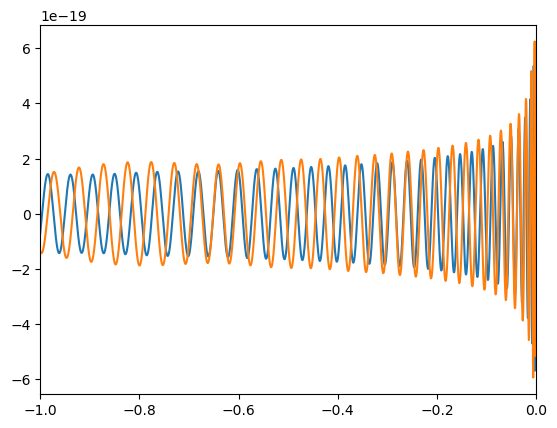

In [44]:
plt.plot(hpt.sample_times, hpt)
plt.plot(hpt1.sample_times, hpt1)
plt.xlim(-1, 0)

In [48]:
dir(bilby.gw.waveform_generator.WaveformGenerator.time_domain_strain)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [49]:
bilby.gw.waveform_generator.WaveformGenerator.time_domain_strain??

In [53]:
bilby.gw.waveform_generator.WaveformGenerator.frequency_domain_strain('sampling_frequency' = 1024, duration = 4, start_time=0)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (469094940.py, line 1)